In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv("Wholesale customers data.csv")

In [3]:
df.shape

(440, 8)

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

df.head()

In [6]:
df=df.drop_duplicates()

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

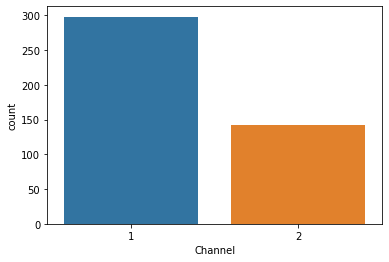

In [9]:
sns.countplot(x="Channel",data=df)
plt.show()

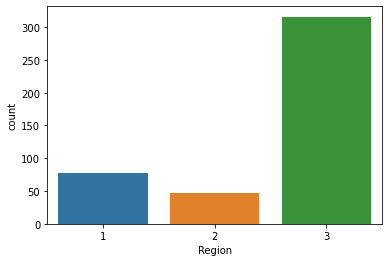

In [10]:
sns.countplot(x="Region",data=df)
plt.show()

In [11]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

C:\Users\anves\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\anves\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


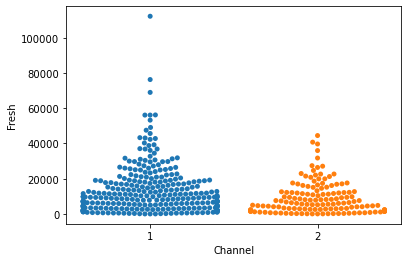

In [12]:
sns.swarmplot(x="Channel",y="Fresh",data=df)
plt.show()

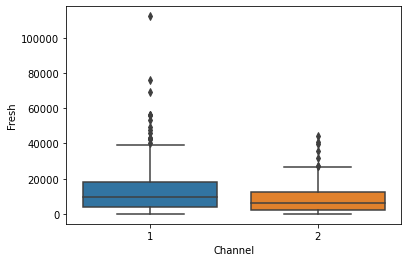

In [19]:
sns.boxplot(x="Channel",y="Fresh",data=df)
plt.show()

In [20]:
df["Fresh"].quantile(0.25)

3127.75

In [21]:
df["Fresh"].quantile(0.50)

8504.0

In [22]:
df["Fresh"].quantile(0.75)

16933.75

In [23]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [24]:
x=df[["Fresh","Milk"]]

In [25]:
from sklearn.cluster import KMeans

In [26]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(n_clusters=6)

In [27]:
x["cluster"]=model.predict(x)

<ipython-input-27-17ed5d468ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=model.predict(x)


In [28]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    sum_distance.append(km.inertia_)
    

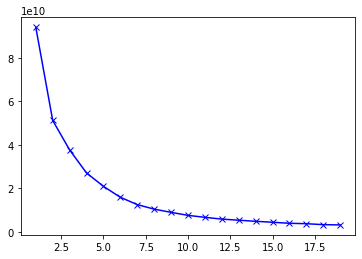

In [77]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [29]:
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[15935.05691057,  3464.28455285],
       [68409.71428571,  7298.85714286],
       [32662.97826087,  5139.7826087 ],
       [ 5073.35294118, 15669.70588235],
       [ 4334.99033816,  3598.43961353],
       [30445.        , 48782.66666667]])

C:\Users\anves\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


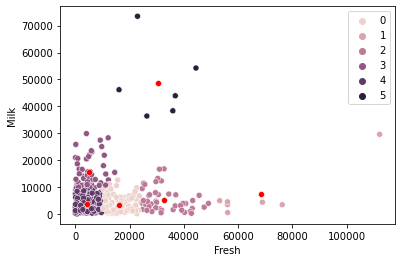

In [30]:
sns.scatterplot(x="Fresh",y="Milk",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='red')
plt.show()

In [31]:
df.columns
df2=df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [32]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(df2)
    sum_distance.append(km.inertia_)

In [33]:
sum_distance

[157595857165.60883,
 113217528520.90987,
 80333265618.48465,
 64855545528.21104,
 53016807013.23574,
 46661782205.91623,
 41171504681.16353,
 36343920411.2058,
 33426063408.493748,
 29911624443.970608,
 27600204654.446045,
 26522372860.906376,
 25360680206.99942,
 23185103198.587772,
 21375313067.02392,
 20507113976.83644,
 18787848568.489502,
 17809829058.132015,
 16633393223.823023]

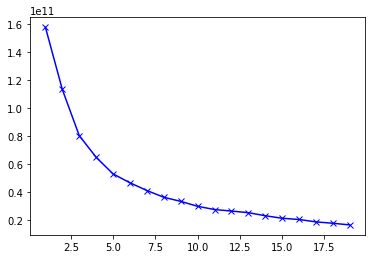

In [34]:
plt.plot(k,sum_distance,'bx-')
plt.show()

In [40]:
model_2=KMeans(n_clusters=6)
model_2.fit(df2)


KMeans(n_clusters=6)

In [41]:
df2["cluster"]=model_2.predict(df2)

<ipython-input-41-fc5ab6f239e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["cluster"]=model_2.predict(df2)


In [42]:
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,4
1,7057,9810,9568,1762,3293,1776,4
2,6353,8808,7684,2405,3516,7844,4
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,5
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,5
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,0


In [43]:
df2['cluster'].value_counts()

0    181
5    103
4     89
2     38
3     24
1      5
Name: cluster, dtype: int64